<a href="https://colab.research.google.com/github/gohjx8808/age-gender-emotion-prediction/blob/main/age_gender_emotion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install mtcnn matplotlib opencv-python Pillow

     |████████████████████████████████| 2.3MB 4.7MB/s 


# **Code starts here**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import mtcnn
import glob
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image 

In [5]:
def draw_facebox(filePath,result_list):
  # load the image
  imageData = cv2.cvtColor(cv2.imread(filePath), cv2.COLOR_BGR2RGB)
  # plot the image
  # plt.imshow(imageData)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  fileName=os.path.basename(filePath)
  counter=1
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']

    x1 = max(0,x)
    x2 = x+width
    y1 = max(0,y)
    y2 = y+height

    xCenter = int((x1 + x2) / 2)
    yCenter = int((y1 + y2) / 2)

    calculatedWidth=xCenter - x1
    calculatedHeight=yCenter - y1
    maxWidthHeight=int(max(calculatedWidth,calculatedHeight))

    if yCenter-maxWidthHeight<0 or yCenter+maxWidthHeight>imageData.shape[0] or xCenter-maxWidthHeight<0 or xCenter+maxWidthHeight>imageData.shape[1]:
      maxWidthHeight=int(min(calculatedWidth,calculatedHeight))
    
    if result['confidence']>0.99:
      croppedFace=imageData[yCenter-maxWidthHeight:yCenter+maxWidthHeight,xCenter-maxWidthHeight:xCenter+maxWidthHeight]
      resizedImage=cv2.resize(croppedFace,(224,224))
      splittedNameExtension=fileName.split('.')
      cv2.imwrite('gdrive/My Drive/age-gender-emotion-prediction/UTKface_inthewild/cropped_faces/'+splittedNameExtension[0]+'_'+str(counter)+'.'+splittedNameExtension[1], cv2.cvtColor(resizedImage,cv2.COLOR_BGR2RGB))
    # create the shape
    # rect = plt.Rectangle((xCenter-maxWidthHeight, yCenter-maxWidthHeight), maxWidthHeight*2,maxWidthHeight*2, fill=False, color='red')
    # draw the box
    # ax.add_patch(rect)
    counter+=1
  # show the plot
  # plt.show()

In [4]:
targetFacesPath1='gdrive/My Drive/age-gender-emotion-prediction/UTKface_inthewild/part1'

KeyboardInterrupt: ignored

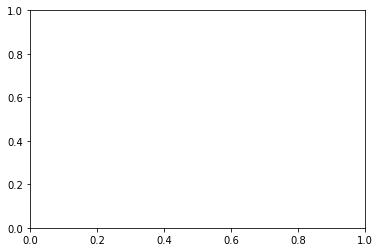

In [6]:
for filename in os.listdir(targetFacesPath1):
  filePath=os.path.join(targetFacesPath1,filename)
  image = cv2.cvtColor(cv2.imread(filePath), cv2.COLOR_BGR2RGB)
  detector = mtcnn.MTCNN()
  faces = detector.detect_faces(image)
  draw_facebox(filePath,faces)

In [ ]:
targetFacesPath2='gdrive/My Drive/age-gender-emotion-prediction/UTKface_inthewild/part2'

In [ ]:
for filename in os.listdir(targetFacesPath2):
  filePath=os.path.join(targetFacesPath2,filename)
  image = cv2.cvtColor(cv2.imread(filePath), cv2.COLOR_BGR2RGB)
  detector = mtcnn.MTCNN()
  faces = detector.detect_faces(image)
  draw_facebox(filePath,faces)

In [ ]:
targetFacesPath3='gdrive/My Drive/age-gender-emotion-prediction/UTKface_inthewild/part3'

In [ ]:
for filename in os.listdir(targetFacesPath3):
  filePath=os.path.join(targetFacesPath3,filename)
  image = cv2.cvtColor(cv2.imread(filePath), cv2.COLOR_BGR2RGB)
  detector = mtcnn.MTCNN()
  faces = detector.detect_faces(image)
  draw_facebox(filePath,faces)